In [33]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
"""
About Dataset
Description:
    - The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. 
    - The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
    - Hours Studied: The total number of hours spent studying by each student.
    - Previous Scores: The scores obtained by students in previous tests.
    - Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
    - Sleep Hours: The average number of hours of sleep the student had per day.
    - Sample Question Papers Practiced: The number of sample question papers the student practiced.
Target Variable:

    - Performance Index: A measure of the overall performance of each student.
                        The performance index represents the student's academic performance and has been rounded to the nearest integer.
                        The index ranges from 10 to 100, with higher values indicating better performance.
"""

# read csv data into dataframe
dataframe = pd.read_csv('./data/Student_Performance.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
dataframe.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [12]:
dataframe.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [13]:
# Encoder Extracurricular Activities column
# Yes == 1 & No == 0

onehot_encoder = OneHotEncoder(drop='first',sparse_output=False)
ExtraActiv = onehot_encoder.fit_transform(dataframe[['Extracurricular Activities']])
ExtraActiv = pd.DataFrame(ExtraActiv)

dataframe['Extracurricular Activities'] = ExtraActiv.astype(int)
dataframe.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


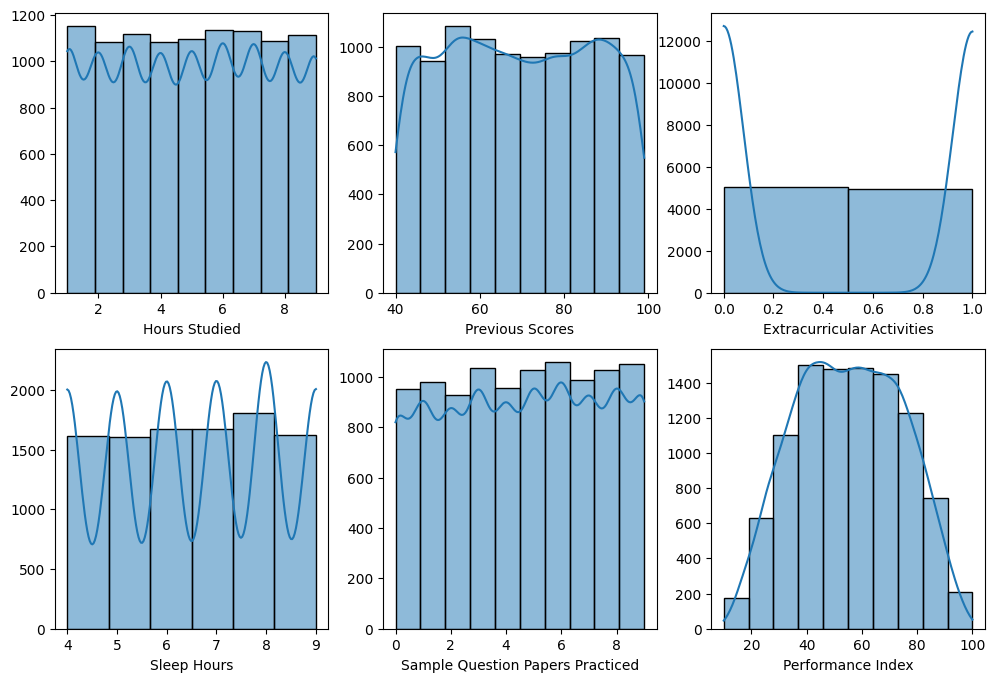

In [98]:
fig, axs = plt.subplots(2,3,figsize=(12, 8))

sns.histplot(dataframe['Hours Studied'],bins=9,kde=True, ax=axs[0,0])
sns.histplot(dataframe['Previous Scores'],bins=10,kde=True, ax=axs[0,1])
sns.histplot(dataframe['Extracurricular Activities'],bins=2,kde=True, ax=axs[0,2])
sns.histplot(dataframe['Sleep Hours'],bins=6,kde=True, ax=axs[1,0])
sns.histplot(dataframe['Sample Question Papers Practiced'],bins=10,kde=True, ax=axs[1,1])
sns.histplot(dataframe['Performance Index'],bins=10,kde=True, ax=axs[1,2])

for i in range(2):
    for j in range(3):
        axs[i,j].set_ylabel('')

plt.show()

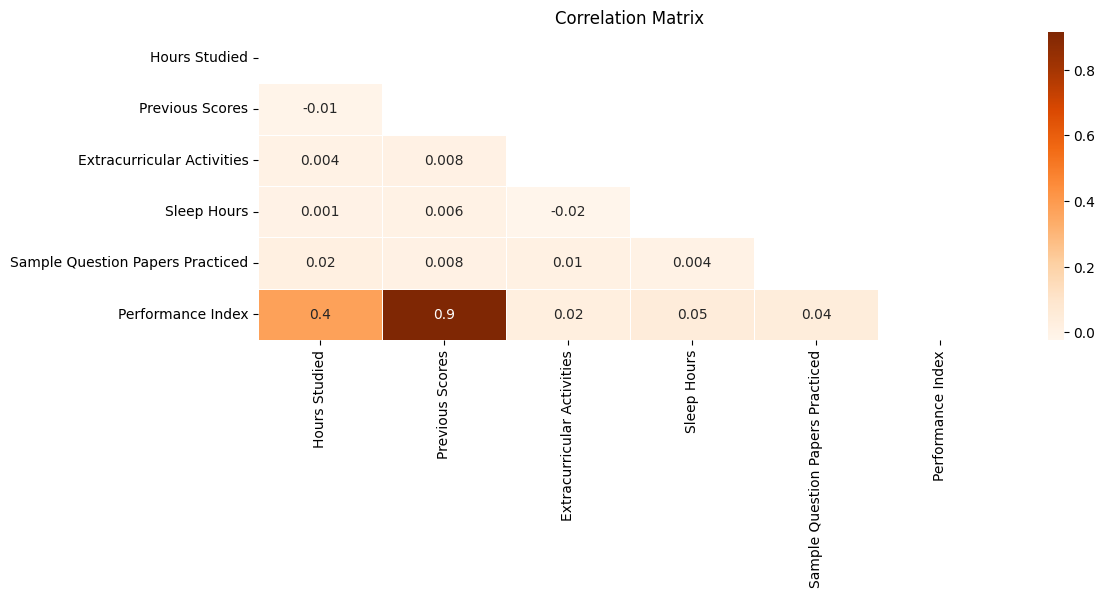

In [14]:
plt.figure(figsize=(12,4))

cmap = sns.color_palette("Oranges", as_cmap=True)
mask = np.triu(np.ones_like(dataframe.corr(), dtype=bool))
sns.heatmap(dataframe.corr(),annot=True, fmt='.1g',cmap=cmap,mask=mask,linewidths=.5,)

plt.title("Correlation Matrix")
plt.show()

In [21]:
# Build Linear Regression Model
X = dataframe.drop(columns="Performance Index")
y = dataframe["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [128]:
y_predict = model.predict(X_test)

print(f"Accuracy: {round(model.score(X_test,y_test)*100,2)}%")

Accuracy: 98.9%


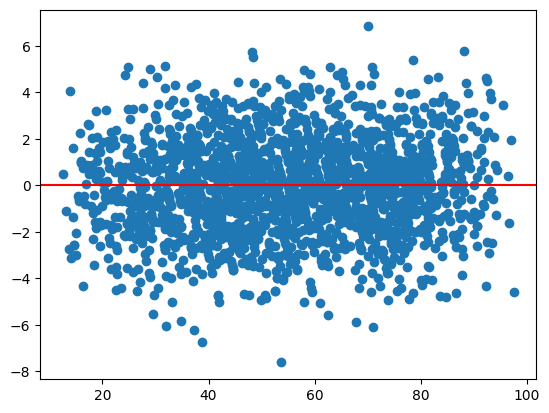

In [42]:
residuals = y_test - y_predict
plt.scatter(y_predict, residuals)
plt.axhline(y=0, color='red')